In [1]:
from prevo.misc import DummyCirculatedBath
from prevo.control import PeriodicControl, Program, Stairs, Teeth
%matplotlib inline

# Define Control Object

In [2]:
class BathControl(PeriodicControl):
    """Dummy control object"""
    
    # Allowed inputs as parameters for control (e.g., vapor pressure, %RH etc)
    possible_inputs = 'temperatures',
    
    def __init__(self, bath, dt=1):
        super().__init__(dt=dt, print_log=True, save_log=False)
        self.bath = bath
        
    
    def _convert_input(self, **values):
        """Convert input from possible_inputs into parameter usable by device."""
        return values['temperatures']
    
    def _apply_setting(self, value):
        self.bath.setpt = value
        
    def _read_setting(self):
        return self.bath.setpt
    
    def _print_setting(self, value):
        return f'Setting: T={value}'

# Define Program

In [3]:
bath = DummyCirculatedBath()
ctrl = BathControl(bath=bath)

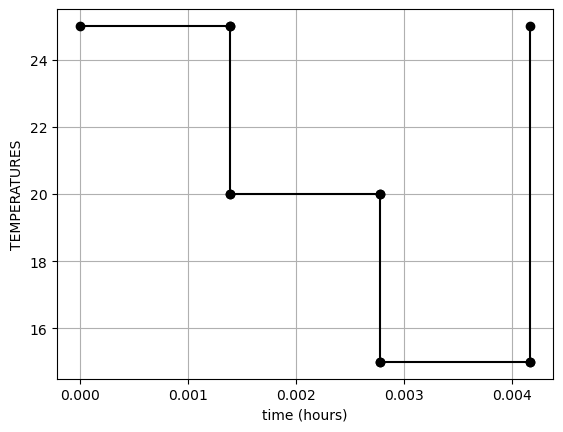

In [5]:
prog = Stairs(control=ctrl, duration='::5', temperatures=[25, 20, 15])
prog.plot()

In [6]:
prog.run()

------ PROGRAM --- NEW CYCLE 1 / 1

[2023-07-07 18:15:37] ------ PROGRAM --- NEW CYCLE 1 / 1

[2023-07-07 18:15:37] ==> NEW STEP from temperatures=25 to temperatures=25 in ::5

[2023-07-07 18:15:37] Setting: T=25
[2023-07-07 18:15:37] Dwelling started (temperatures=25)

[2023-07-07 18:15:42] Dwelling finished

[2023-07-07 18:15:42] ==> NEW STEP from temperatures=25 to temperatures=20 in ::

[2023-07-07 18:15:42] Setting: T=20
[2023-07-07 18:15:42] ==> NEW STEP from temperatures=20 to temperatures=20 in ::5

[2023-07-07 18:15:42] Setting: T=20
[2023-07-07 18:15:42] Dwelling started (temperatures=20)



In [7]:
prog.stop()

[2023-07-07 18:15:44] ==X Manual STOP

------ PROGRAM --- STOPPED


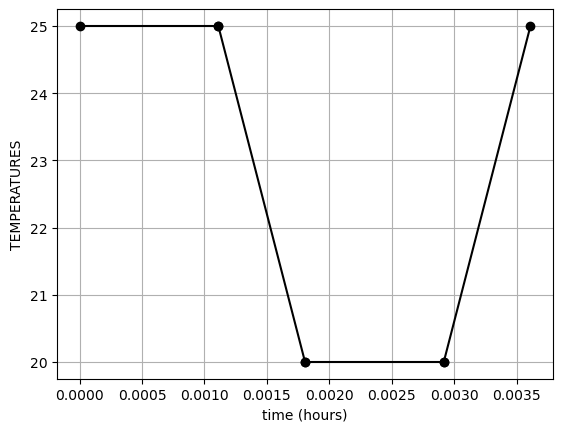

In [8]:
prog = Teeth(control=ctrl, slope=2, slope_unit='/s', plateau_duration="::4", temperatures=[25, 20], repeat=2)
prog.plot()